In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

from scipy.interpolate import make_interp_spline
import rpy2.robjects as robjects
import pyreadr

In [2]:
path="../results4/"


In [3]:
def remove_duplicate(x,y):
    unique_v, idx, count = np.unique(x, return_inverse=True, return_counts=True)
    m = np.zeros((unique_v.size, 2))
    m[:,0] = unique_v
    duplicate_v = np.where(count>1)[0]
    for i in duplicate_v:
        j = np.where(idx==i)[0]
        max_val = np.max(y[j])
        m[ i, 1] = max_val
    single_v = np.where(count==1)[0]
    for i in single_v:
        j = np.where(idx==i)[0]
        m[i,1] = y[j]
    return m




In [7]:
filename="model1_true3_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)),'o-',label="true A (initialization)")

#plt.scatter(m[:,0], m[:,1], label="true A (initialization)")
x = np.arange(0,1.1,.1)



filename="model1_true3_refine_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)),'o-',label="true A (initialization + updates)")

#plt.scatter(m[:,0], m[:,1], label="true A (initialization + updates)")


#plt.scatter(arr2[:,1], arr2[:,0])
plt.plot(x,x,color='k')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve of Model 1 (N=1000)")

filename="model1_data3_N1000_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)),'o-', label="estimated A (initialization)")

#plt.scatter(m[:,0], m[:,1], label="estimated A (initialization)")

filename="model1_data3_N1000_refine_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)),'o-',label="estimated A (initialization + updates)")

#plt.scatter(m[:,0], m[:,1], label="estimated A (initialization + updates)")



filename="model1_random3_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), 'o-',label="random initialization (updates)")

#plt.scatter(m[:,0], m[:,1], label="random initialization (updates)")




filename="model1_random4_(zeroB)_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), 'o-', label=r"random initialization ($B^0=0$) (updates)")

#plt.scatter(m[:,0], m[:,1], label=r"random initialization ($B^0=0$) (updates)")




filename="model1_data3_N1000_(Brandom)_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
print(m)
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)),'o-', label=r"estimated A ($B\sim\mathcal{N}(0,0.001)$) (initilization+updates)")

#plt.scatter(m[:,0], m[:,1], label=r"estimated A ($B\sim\mathcal{N}(0,0.001)$) (initilization+updates)")

plt.legend(bbox_to_anchor=(1.1, 1.05))


FileNotFoundError: [Errno 2] No such file or directory: '../results4/model1_true3_tprfpr.npy'

In [59]:
prefix = "model2_data_"
file_list = ["N50_", "N100_", "N1000_"]
file_label = ["N=50", "N=100", "N=1000"]
setting = ["onlyini_", "withini_", "noini(D ortho)_"]
setting_label = [" (initialization)", " (initialization+updates)", " (random initialization)"]
postfix = "tprfpr.npy"

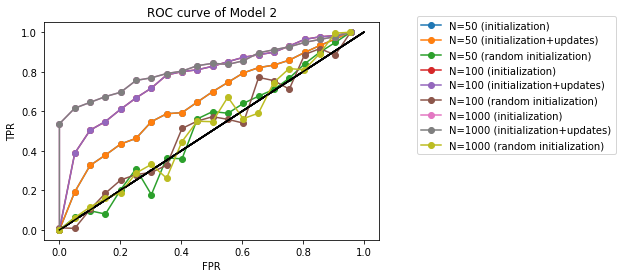

In [60]:
for n_idx, n_sub in enumerate(file_list):
    for m_id, method in enumerate(setting):
        filename = prefix + n_sub + method + postfix


        arr = np.load(path+filename)
        sort_fpr = np.argsort(arr[:,1]) 

        arr2 = np.zeros(arr.shape)
        arr2[:,0] = arr[sort_fpr,0]
        arr2[:,1] = arr[sort_fpr,1]

        m = remove_duplicate(arr2[:,1], arr2[:,0])
        #m = np.vstack((np.array([0,0]), m))
        X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
        X_ = np.linspace(0, np.max(arr2[:, 1]), 20)
        Y_ = X_Y_Spline(X_)
        
        plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)),'o-',label=file_label[n_idx] + setting_label[m_id])
        
        #plt.scatter(arr2[:,1], arr2[:,0], label=file_label[n_idx] + setting_label[m_id])
        x = np.arange(0,1.1,.1)

        #plt.scatter(arr2[:,1], arr2[:,0])
        plt.plot(x,x,color='k')
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC curve of Model 2")
plt.legend(bbox_to_anchor=(1.1, 1.05))

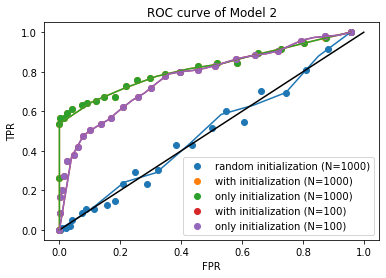

In [81]:
filename="model2_data_N1000_noini_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 10)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)))

plt.scatter(arr2[:,1], arr2[:,0], label="random initialization (N=1000)")
x = np.arange(0,1.1,.1)

#plt.scatter(arr2[:,1], arr2[:,0])
plt.plot(x,x,color='k')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve of Model 2")

filename="model2_data_N1000_withini_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]
m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 10)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)))

plt.scatter(arr2[:,1], arr2[:,0], label="with initialization (N=1000)")




filename="model2_data_N1000_onlyini_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]
m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 10)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)))

plt.scatter(arr2[:,1], arr2[:,0], label="only initialization (N=1000)")






filename="model2_data_N100_withini_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]
m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 25)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)))

plt.scatter(arr2[:,1], arr2[:,0], label="with initialization (N=100)")




filename="model2_data_N100_onlyini_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]
m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 25)
Y_ = X_Y_Spline(X_)
plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)))

plt.scatter(arr2[:,1], arr2[:,0], label="only initialization (N=100)")






plt.legend(loc="lower right")





In [33]:
import csv

In [34]:


import matplotlib.cm as cm
color_map  = cm.get_cmap('tab20c')

3
364
432
3
451
736


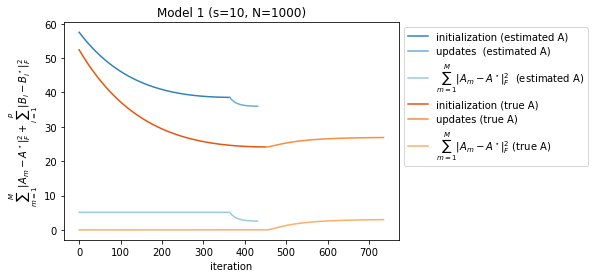

In [233]:
filename = "model1_data4_s10_res.csv"
color_map  = cm.get_cmap('tab20c')
count = 0
list_res = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count +=1
        list_res.append(row)
            
print(count)


x = len(list_res[0])
plt.title("Model 1 (s=10, N=1000)")

plt.plot(np.arange(x),[float(x) for x in list_res[0]], label="initialization (estimated A)", color=color_map(0))
print(x)
x2 = x + len(list_res[1])
print(x2)
plt.plot(np.arange(x,x2), [float(x) for x in list_res[1]], label="updates  (estimated A)", color=color_map(1))

plt.plot(np.arange(x2), [float(x) for x in list_res[2]], label=r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2$  (estimated A)', color=color_map(2))
plt.xlabel("iteration")
plt.ylabel(r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2+\sum_{i=1}^p\|B_i-B_i^\star\|_F^2$')



filename = "model1_true4_s10_res.csv"
count = 0
list_res = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count +=1
        list_res.append(row)
            
print(count)


x = len(list_res[0])
plt.title("Model 1 (s=10, N=1000)")
plt.plot(np.arange(x),[float(x) for x in list_res[0]], label="initialization (true A)", color=color_map(4))
print(x)
x2 = x + len(list_res[1])
print(x2)
plt.plot(np.arange(x,x2), [float(x) for x in list_res[1]], label="updates (true A)", color=color_map(5))

plt.plot(np.arange(x2), [float(x) for x in list_res[2]], label=r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2$ (true A)', color=color_map(6))
plt.xlabel("iteration")
plt.ylabel(r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2+\sum_{i=1}^p\|B_i-B_i^\star\|_F^2$')






plt.legend(bbox_to_anchor=(1., 1.))

3
0
265


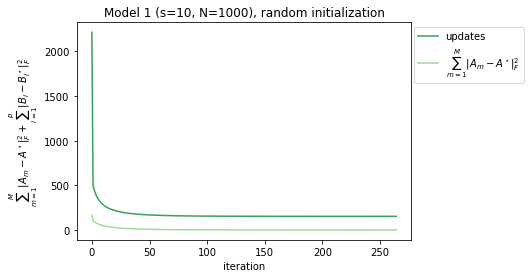

In [234]:
filename = "model1_random4_s10_res.csv"
count = 0
list_res = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count +=1
        list_res.append(row)
            
print(count)


x = len(list_res[0])
plt.title("Model 1 (s=10, N=1000), random initialization")
#plt.plot(np.arange(x),[float(x) for x in list_res[0]], label="initialization", color=color_map(8))
print(x)
x2 = x + len(list_res[1])
print(x2)
plt.plot(np.arange(x,x2), [float(x) for x in list_res[1]], label="updates", color=color_map(8))

plt.plot(np.arange(x2), [float(x) for x in list_res[2]], label=r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2$', color=color_map(10))
plt.xlabel("iteration")
plt.ylabel(r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2+\sum_{i=1}^p\|B_i-B_i^\star\|_F^2$')

plt.legend(bbox_to_anchor=(1.35, 1.))





plt.legend(bbox_to_anchor=(1.35, 1.))

3
0
275


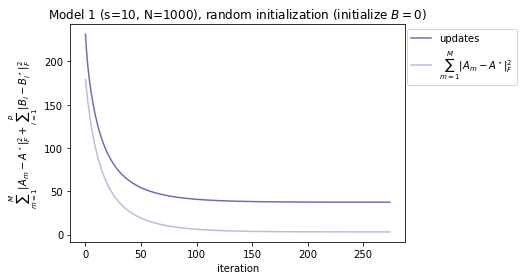

In [238]:
filename = "model1_random4_2_s10_res.csv"
count = 0
list_res = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count +=1
        list_res.append(row)
            
print(count)


x = len(list_res[0])
plt.title(r'Model 1 (s=10, N=1000), random initialization (initialize $B=0$)')
#plt.plot(np.arange(x),[float(x) for x in list_res[0]], label="initialization", color=color_map(8))
print(x)
x2 = x + len(list_res[1])
print(x2)
plt.plot(np.arange(x,x2), [float(x) for x in list_res[1]], label="updates", color=color_map(12))

plt.plot(np.arange(x2), [float(x) for x in list_res[2]], label=r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2$', color=color_map(14))
plt.xlabel("iteration")
plt.ylabel(r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2+\sum_{i=1}^p\|B_i-B_i^\star\|_F^2$')


plt.legend(bbox_to_anchor=(1.35, 1.))

3
338
620


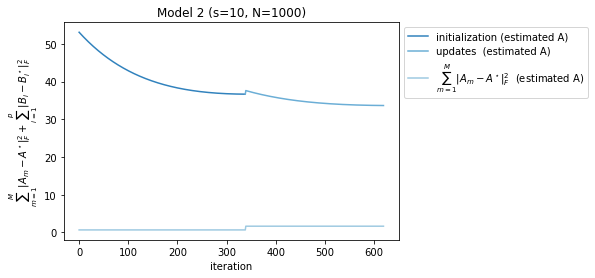

In [240]:

filename = "model2_data2_N1000_s10_withini_res.csv"
color_map  = cm.get_cmap('tab20c')
count = 0
list_res = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    for row in reader:
        count +=1
        list_res.append(row)
            
print(count)


x = len(list_res[0])
plt.title("Model 2 (s=10, N=1000)")

plt.plot(np.arange(x),[float(x) for x in list_res[0]], label="initialization (estimated A)", color=color_map(0))
print(x)
x2 = x + len(list_res[1])
print(x2)
plt.plot(np.arange(x,x2), [float(x) for x in list_res[1]], label="updates  (estimated A)", color=color_map(1))

plt.plot(np.arange(x2), [float(x) for x in list_res[2]], label=r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2$  (estimated A)', color=color_map(2))
plt.xlabel("iteration")
plt.ylabel(r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2+\sum_{i=1}^p\|B_i-B_i^\star\|_F^2$')





plt.legend(bbox_to_anchor=(1., 1.))

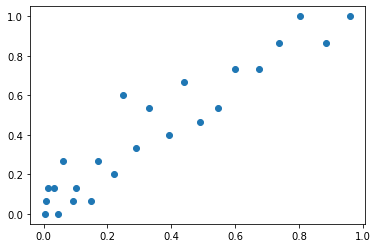

In [58]:
filename="model2_random_graph_N1000_withini_tprfpr"
arr = np.load(path+filename+".npy")
sort_fpr = np.argsort(arr[:,1])

arr2 = np.zeros(arr.shape)
arr2[:,0] = arr[sort_fpr,0]
arr2[:,1] = arr[sort_fpr,1]

m = remove_duplicate(arr2[:,1], arr2[:,0])
#m = np.vstack((np.array([0,0]), m))
X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
X_ = np.linspace(0, np.max(arr2[:, 1]), 10)
Y_ = X_Y_Spline(X_)
#plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)))

plt.scatter(m[:,0], m[:,1], label="true A (initialization)")
x = np.arange(0,1.1,.1)



In [29]:
import sys
import csv

sys.path.append("../src/Utility")

from utility import plot_multiple_roc

In [31]:
def plot_multiple_roc(file_list, name_list, title=None, nknot=10, scatter=False):
    for file, name in zip(file_list, name_list):
        arr = np.load(file)
        sort_fpr = np.argsort(arr[:,1])

        arr2 = np.zeros(arr.shape)
        arr2[:,0] = arr[sort_fpr,0]
        arr2[:,1] = arr[sort_fpr,1]

        m = remove_duplicate(arr2[:,1], arr2[:,0])
        #m = np.vstack((np.array([0,0]), m))
        X_Y_Spline = make_interp_spline(m[:,0], m[:,1])
        X_ = np.linspace(0, np.max(arr2[:, 1]), nknot)
        Y_ = X_Y_Spline(X_)
        plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o', label=name)
        plt.legend()
        if scatter:
            plt.scatter(arr2[:,1], arr2[:,0])
        #plt.scatter(m[:,0], m[:,1], )

    
    x = np.arange(0,1.1,.1)
    plt.plot(x,x,color='k')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    if title is not None:
        plt.title(title)


In [2]:
from os.path import exists

In [3]:
def remove_duplicate(x,y):
    unique_v, idx, count = np.unique(x, return_inverse=True, return_counts=True)
    m = np.zeros((unique_v.size, 2))
    m[:,0] = unique_v
    duplicate_v = np.where(count>1)[0]
    for i in duplicate_v:
        j = np.where(idx==i)[0]
        max_val = np.max(y[j])
        m[ i, 1] = max_val
    single_v = np.where(count==1)[0]
    for i in single_v:
        j = np.where(idx==i)[0]
        m[i,1] = y[j]
    return m


150


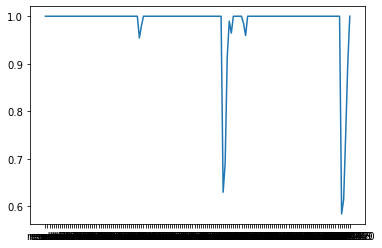

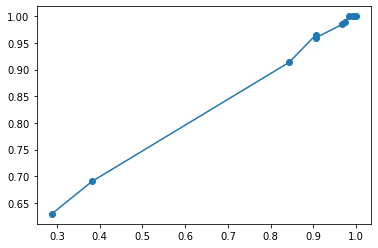

In [37]:
filename="../results_c/tridiag1_p100_N50_jfggm_stage2.RunInd3.Rdata"
obj = pyreadr.read_r(filename)
print(len(obj['roc']['TPR.jfggm']))
plt.plot(obj['roc']['TPR.jfggm'])
tpr_jfggm = obj['roc']['TPR.jfggm'][50:100]
fpr_jfggm = obj['roc']['FPR.jfggm'][50:100]
plt.show()
m = remove_duplicate(fpr_jfggm , tpr_jfggm)
plt.plot(m[:,0], m[:,1], '-o', label="jfggm")
X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
X_ = np.linspace(0, np.max(m[:, 1]), 10)
Y_ = X_Y_Spline(X_)
#plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
#plt.plot(X_, Y_, '-o', label='jfggm2')

In [20]:

#file_list=['power_p150_N50', 'random_p150_N100', 'random_p150_N500']
def plotplot(gid, graphname, p):
    file_list = list()
    N_list = [50,100,500]
    basefile = '{}_p{}'.format(graphname, p)
    for i in N_list:
        file_list.append(basefile +'_N{}'.format(i))
    fig, axlist = plt.subplots(1,3,figsize=(9, 3), dpi=300)
    fig.suptitle('ROC curve of graph {}({}), p={}'.format(gid, graphname, p))
    i = 1
    for ax,filename in zip(axlist,file_list):
        #ax.subplot(1, 4, i)
        ax.title.set_text("N={}".format(N_list[i-1]))
        #if i ==1:
        #    plt.ylabel('TPR')
        #if i == 2:
        #    plt.xlabel('FPR')
        i+=1
        path="../results5/"
        p_file = path+"model3_"+filename+"_Iest_run7_tprfpr.npy"
        arr = np.load(p_file)
        sort_fpr = np.argsort(arr[:,1])

        flng = np.zeros(arr.shape)
        flng[:,0] = arr[sort_fpr,0]
        flng[:,1] = arr[sort_fpr,1]

        m = remove_duplicate(flng[:,1], flng[:,0])

        if m.shape[0]<=15:
            ax.plot(m[:,0], m[:,1], '-o', label="proposed model")
        else:
            X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
            X_ = np.linspace(0, np.max(m[:, 1]), 10)
            Y_ = X_Y_Spline(X_)
            #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
            ax.plot(X_, Y_, '-o', label="proposed model")

        if(exists('../results_c_2/'+filename+'_light.RunInd2.Rdata')):
            obj = pyreadr.read_r('../results_c_2/'+filename+'_light.RunInd2.Rdata')
            #print('load file from directory: '+ './results_c_vision/')
        else:
            pass
        #print(obj)
        qiao_fpr = np.array(obj['roc']['FPR.qiao'])
        qiao_tpr = np.array(obj['roc']['TPR.qiao'])

        sort_fpr = np.argsort(qiao_fpr)

        qiao = np.zeros((qiao_tpr.shape[0],2))
        qiao[:,0] = qiao_fpr[sort_fpr]
        qiao[:,1] = qiao_tpr[sort_fpr]
        #plt.plot(arr2[:,0], arr2[:,1],'-o')

        m = remove_duplicate(qiao[:,0], qiao[:,1])
        #print(m.sh)
        if m.shape[0]<=15:
            ax.plot(m[:,0], m[:,1], '-o', label='Qiao et al., 2019')
        else:
            X_Y_Spline = make_interp_spline(m[:,0], m[:,1],k=1)
            X_ = np.linspace(0, np.max(m[:, 1]), 15)
            Y_ = X_Y_Spline(X_)
            #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
            ax.plot(X_, Y_, '-o',  label='Qiao et al., 2019')

        zapata_fpr = np.array(obj['roc']['FPR.zapata'])
        zapata_tpr = np.array(obj['roc']['TPR.zapata'])
        sort_fpr = np.argsort(zapata_fpr)

        zapata = np.zeros((zapata_tpr.shape[0],2))
        zapata[:,0] = zapata_fpr[sort_fpr]
        zapata[:,1] = zapata_tpr[sort_fpr]
        m = remove_duplicate(zapata[:,0], zapata[:,1])

        if m.shape[0]<=15:
            ax.plot(m[:,0], m[:,1], '-o', label='Zapata et al., 2021')
        else:
            X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
            X_ = np.linspace(0, np.max(m[:, 1]), 10)
            Y_ = X_Y_Spline(X_)
            #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
            ax.plot(X_, Y_, '-o', label='Zapata et al., 2021')

        def jfggm_exist():
            jfggm_fpr = np.array(obj['roc']['FPR.jfggm'])
            jfggm_tpr = np.array(obj['roc']['TPR.jfggm'])

            sort_fpr = np.argsort(jfggm_fpr)

            jfggm = np.zeros((jfggm_tpr.shape[0],2))
            jfggm[:,0] = jfggm_fpr[sort_fpr]
            jfggm[:,1] = jfggm_tpr[sort_fpr]
            #print(jfggm.shape)
            m = remove_duplicate(jfggm[:,0], jfggm[:,1])

            if m.shape[0]<=30:
                ax.plot(m[:,0], m[:,1], '-o', label="Moysidis et al., 2021")
            else:
                X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
                X_ = np.linspace(0, np.max(m[:, 1]), 15)
                Y_ = X_Y_Spline(X_)
                #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
                ax.plot(X_, Y_, '-o', label="Moysidis et al., 2021")


        if(exists('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')):
            obj = pyreadr.read_r('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')
            jfggm_exist()
        elif(exists('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')):
            obj = pyreadr.read_r('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')
            jfggm_exist()
        else:
            pass
        if i == 2:
            handles, labels = ax.get_legend_handles_labels()
    if len(labels)==3:
        b = 0.85
    else:
        b = 0.96
    fig.legend(handles, labels, ncol=len(labels), bbox_to_anchor=(b, -0.0))

    fig.supxlabel('FPR')
    fig.supylabel('TPR')
    fig.tight_layout()
    fig.savefig('../images/roc/compare_'+basefile+'.png', bbox_inches='tight')

    #print(labels)

In [ ]:
    for i in N_list:
        file_list.append(basefile +'_N{}'.format(i))
    fig, axlist = plt.subplots(1,3,figsize=(9, 3), dpi=300)
    fig.suptitle('ROC curve of graph {}({}), p={}'.format(gid, graphname, p))
    i = 1
    for ax,filename in zip(axlist,file_list):
        #ax.subplot(1, 4, i)
        ax.title.set_text("N={}".format(N_list[i-1]))
        #if i ==1:
        #    plt.ylabel('TPR')
        #if i == 2:
        #    plt.xlabel('FPR')
        i+=1
        path="../results5/"
        p_file = path+"model3_"+filename+"_Iest_run7_tprfpr.npy"
        arr = np.load(p_file)
        sort_fpr = np.argsort(arr[:,1])

        flng = np.zeros(arr.shape)
        flng[:,0] = arr[sort_fpr,0]
        flng[:,1] = arr[sort_fpr,1]

        m = remove_duplicate(flng[:,1], flng[:,0])

        if m.shape[0]<=15:
            ax.plot(m[:,0], m[:,1], '-o', label="proposed model")
        else:
            X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
            X_ = np.linspace(0, np.max(m[:, 1]), 10)
            Y_ = X_Y_Spline(X_)
            #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
            ax.plot(X_, Y_, '-o', label="proposed model")

        if(exists('../results_c_2/'+filename+'_light.RunInd2.Rdata')):
            obj = pyreadr.read_r('../results_c_2/'+filename+'_light.RunInd2.Rdata')
            #print('load file from directory: '+ './results_c_vision/')
        else:
            pass
        #print(obj)
        qiao_fpr = np.array(obj['roc']['FPR.qiao'])
        qiao_tpr = np.array(obj['roc']['TPR.qiao'])

        sort_fpr = np.argsort(qiao_fpr)

        qiao = np.zeros((qiao_tpr.shape[0],2))
        qiao[:,0] = qiao_fpr[sort_fpr]
        qiao[:,1] = qiao_tpr[sort_fpr]
        #plt.plot(arr2[:,0], arr2[:,1],'-o')

        m = remove_duplicate(qiao[:,0], qiao[:,1])
        #print(m.sh)
        if m.shape[0]<=15:
            ax.plot(m[:,0], m[:,1], '-o', label='Qiao et al., 2019')
        else:
            X_Y_Spline = make_interp_spline(m[:,0], m[:,1],k=1)
            X_ = np.linspace(0, np.max(m[:, 1]), 15)
            Y_ = X_Y_Spline(X_)
            #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
            ax.plot(X_, Y_, '-o',  label='Qiao et al., 2019')

        zapata_fpr = np.array(obj['roc']['FPR.zapata'])
        zapata_tpr = np.array(obj['roc']['TPR.zapata'])
        sort_fpr = np.argsort(zapata_fpr)

        zapata = np.zeros((zapata_tpr.shape[0],2))
        zapata[:,0] = zapata_fpr[sort_fpr]
        zapata[:,1] = zapata_tpr[sort_fpr]
        m = remove_duplicate(zapata[:,0], zapata[:,1])

        if m.shape[0]<=15:
            ax.plot(m[:,0], m[:,1], '-o', label='Zapata et al., 2021')
        else:
            X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
            X_ = np.linspace(0, np.max(m[:, 1]), 15)
            Y_ = X_Y_Spline(X_)
            #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
            ax.plot(X_, Y_, '-o', label='Zapata et al., 2021')

        def jfggm_exist():
            jfggm_fpr = np.array(obj['roc']['FPR.jfggm'])
            jfggm_tpr = np.array(obj['roc']['TPR.jfggm'])

            sort_fpr = np.argsort(jfggm_fpr)

            jfggm = np.zeros((jfggm_tpr.shape[0],2))
            jfggm[:,0] = jfggm_fpr[sort_fpr]
            jfggm[:,1] = jfggm_tpr[sort_fpr]
            #print(jfggm.shape)
            m = remove_duplicate(jfggm[:,0], jfggm[:,1])

            if m.shape[0]<=30:
                ax.plot(m[:,0], m[:,1], '-o', label="Moysidis et al., 2021")
            else:
                X_Y_Spline = make_interp_spline(m[:,0], m[:,1], k=1)
                X_ = np.linspace(0, np.max(m[:, 1]), 15)
                Y_ = X_Y_Spline(X_)
                #plt.plot(np.hstack((0.,X_)), np.hstack((0.,Y_)), '-o')
                ax.plot(X_, Y_, '-o', label="Moysidis et al., 2021")


        if(exists('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')):
            obj = pyreadr.read_r('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')
            jfggm_exist()
        elif(exists('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')):
            obj = pyreadr.read_r('../results_c_2/'+filename+'_jfggm.RunInd2.Rdata')
            jfggm_exist()
        else:
            pass
        if i == 2:
            handles, labels = ax.get_legend_handles_labels()
    if len(labels)==3:
        b = 0.85
    else:
        b = 0.96
    fig.legend(handles, labels, ncol=len(labels), bbox_to_anchor=(b, -0.0))

    fig.supxlabel('FPR')
    fig.supylabel('TPR')
    fig.tight_layout()
    fig.savefig('../images/roc/compare_'+basefile+'.png', bbox_inches='tight')

    #print(labels)

KeyError: 'roc'

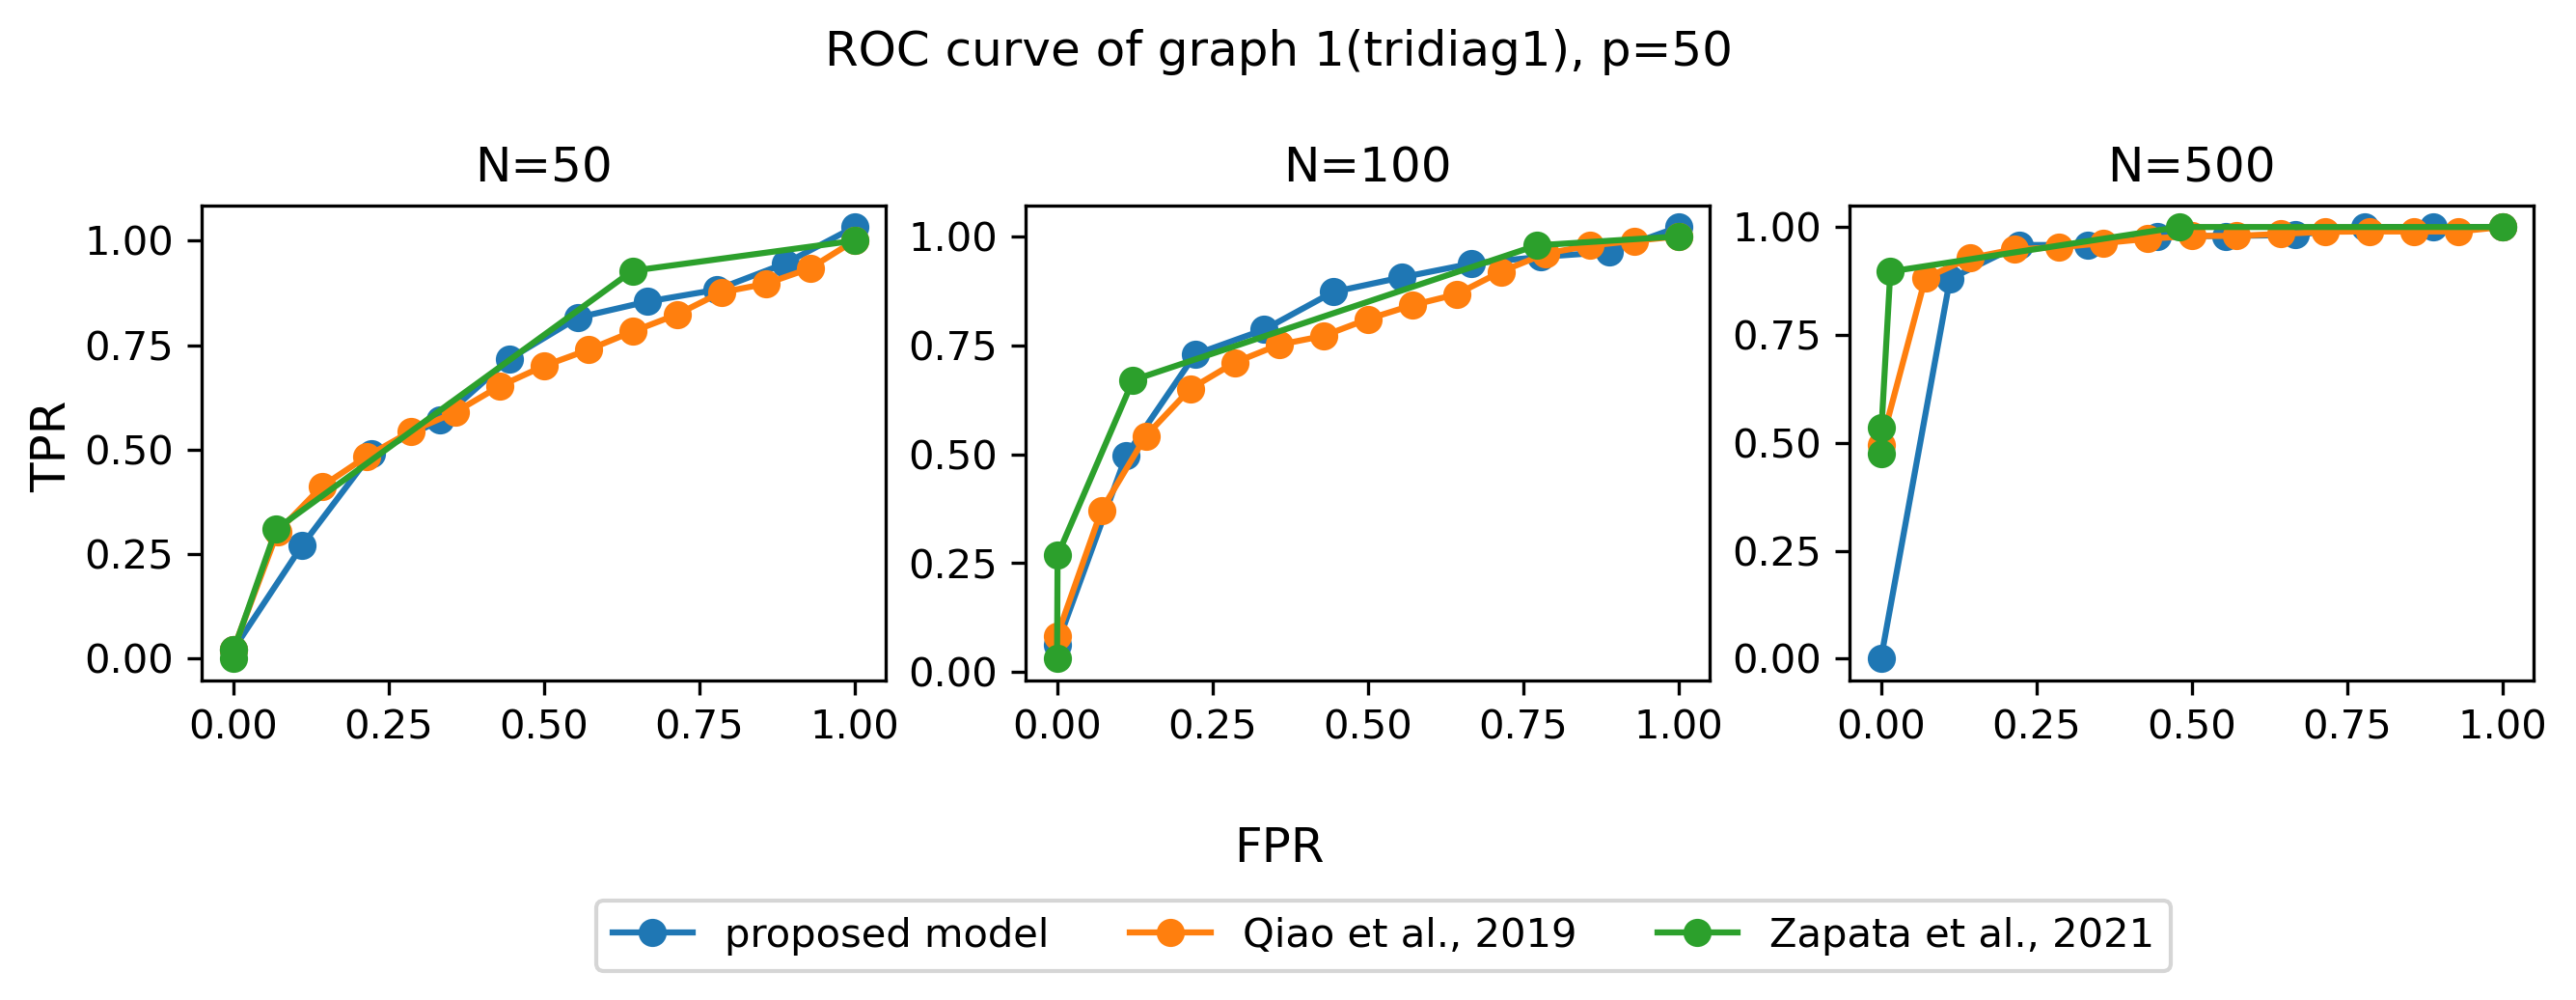

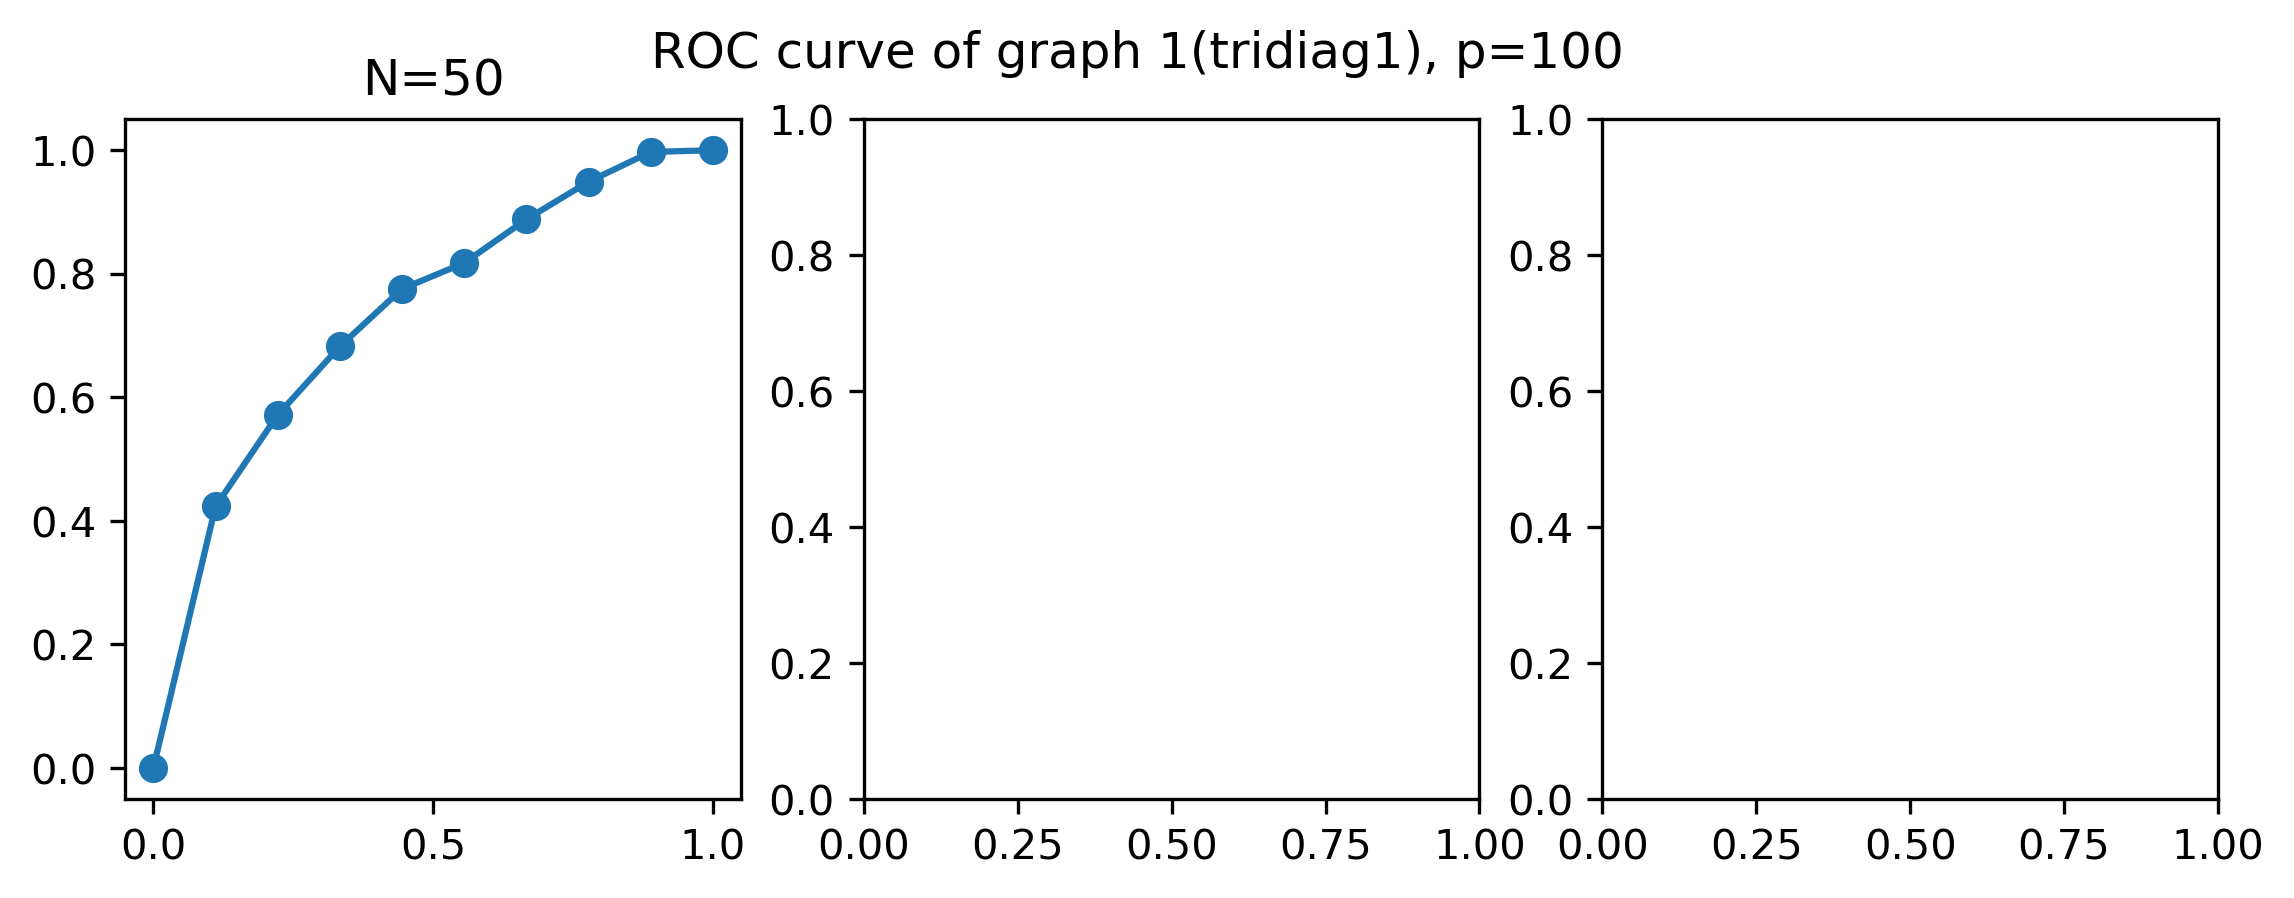

In [21]:
plotplot(gid=1, graphname='tridiag1', p=50)
plotplot(gid=1, graphname='tridiag1', p=100)
plotplot(gid=1, graphname='tridiag1', p=150)

plotplot(gid=2, graphname='tridiag2', p=50)
plotplot(gid=2, graphname='tridiag2', p=100)
plotplot(gid=2, graphname='tridiag2', p=150)

plotplot(gid=3, graphname='tridiag3', p=50)
plotplot(gid=3, graphname='tridiag3', p=100)
plotplot(gid=3, graphname='tridiag3', p=150)

plotplot(gid=4, graphname='power', p=50)
plotplot(gid=4, graphname='power', p=100)
plotplot(gid=4, graphname='power', p=150)

plotplot(gid=5, graphname='random', p=50)
#plotplot(gid=5, graphname='random', p=100)
plotplot(gid=5, graphname='random', p=150)



In [23]:
path="../results4/"
file_list = list()
name_list = list()
p = [50]
N = [50,100,200,500]
cov_type = "tridiag3"
initype = ['est']

for  model in [3]:
    for pp in p:
        for n in N:
            for ini in initype:
                
                file_list.append(path+"model{}_{}_p{}_N{}_I{}_run6_tprfpr.npy".format(model,cov_type,pp,n,ini))
                name_list.append("N={}".format(n))


#initype = ['est']
#for  model in [3]:
#    for pp in p:
#        for n in N:
#            for ini in initype:
                
#                file_list.append(path+"model{}_{}_p{}_N{}_I{}_run6_tprfpr.npy".format(model,cov_type,pp,n,ini))
#                name_list.append("model{}: p={}, N={}, {}".format(model, pp,n, ini))


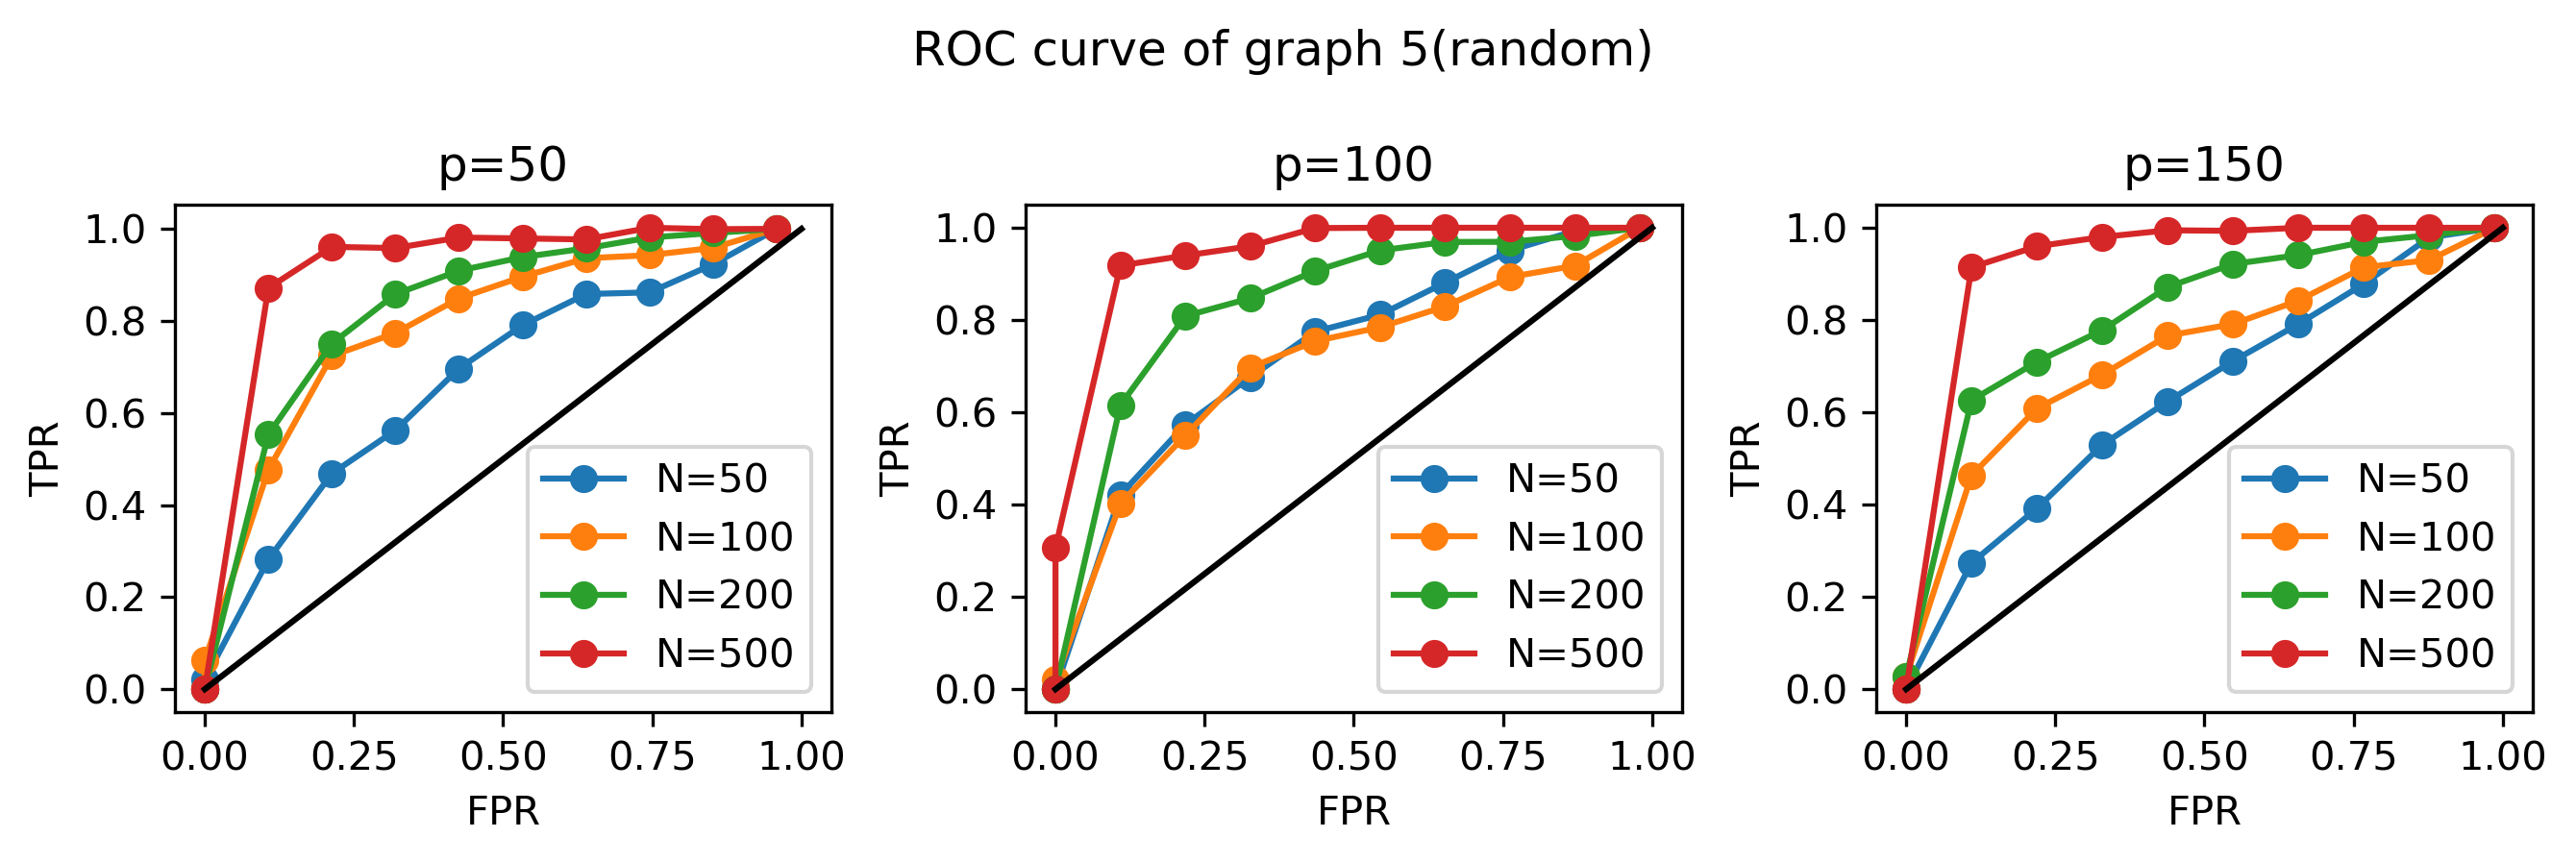

In [40]:
path="../results5/"

model = 3
N = [50,100,200,500]
cov_type = "tridiag1"
initype = ['est']
fig = plt.figure(figsize=(9, 3), dpi=300)
fig.suptitle('ROC curve of graph 5(random)')
i = 1
for p in [50,100,150]:
    file_list = list()
    name_list = list()
    for n in N:
        for ini in initype:
        
            file_list.append(path+"model{}_{}_p{}_N{}_I{}_run7_tprfpr.npy".format(model,cov_type,p,n,ini))
            name_list.append("N={}".format(n))

    plt.subplot(1, 3, i)
    plot_multiple_roc(file_list, name_list, title='p={}'.format(p), nknot=10)
    i += 1
    
fig.tight_layout()




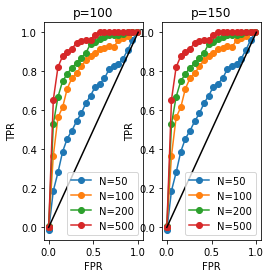

In [25]:



plt.subplot(1, 3, 2)
plot_multiple_roc(file_list, name_list, title='p=100', nknot=20)
plt.subplot(1, 3, 3)
plot_multiple_roc(file_list, name_list, title='p=150', nknot=20)

fig.tight_layout()

In [65]:
filename = "model1_tridiag1_p100_N1000_Iest_res.csv"
path="../results2/"
count = 0
list_res = list()
ini_res_list = list()
res_list = list()
distA_list = list()
A_norm_list = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    
    
    for row in reader:
        count +=1
        if count<=25:
            ini_res_list.append(row)
        elif count <= 50:
            res_list.append(row)
        elif count <= 75:
            distA_list.append(row)
        else:
            A_norm_list.append(row)
            
        
print(count)

100


In [67]:
len(res_list)

25

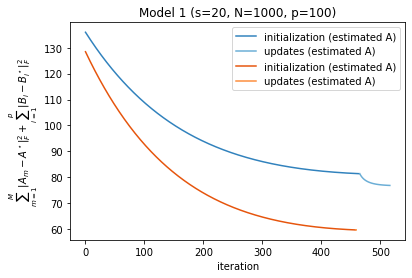

In [101]:


plt.title("Model 1 (s=20, N=1000, p=100)")


filename = "model1_tridiag1_p100_N1000_Iest_res.csv"
path="../results2/"
count = 0
list_res = list()
ini_res_list = list()
res_list = list()
distA_list = list()
A_norm_list = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    
    
    for row in reader:
        count +=1
        if count<=25:
            ini_res_list.append(row)
        elif count <= 50:
            res_list.append(row)
        elif count <= 75:
            distA_list.append(row)
        else:
            A_norm_list.append(row)
id = 5
x = np.arange(len(ini_res_list[id ]))
plt.plot(x, ini_res_list[id ], label="initialization (estimated A)",  color=color_map(0))
y = np.arange(len(ini_res_list[id ]),len(ini_res_list[id ])+len(res_list[id]))
plt.plot(y,res_list[id], label="updates (estimated A)", color=color_map(1))




filename = "model1_tridiag1_p100_N1000_Itrue_res.csv"
path="../results2/"
count = 0
list_res = list()
ini_res_list = list()
res_list = list()
distA_list = list()
A_norm_list = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    
    
    for row in reader:
        count +=1
        if count<=25:
            ini_res_list.append(row)
        elif count <= 50:
            res_list.append(row)
        elif count <= 75:
            distA_list.append(row)
        else:
            A_norm_list.append(row)

id = 5
x = np.arange(len(ini_res_list[id]))
plt.plot(x, ini_res_list[id], label="initialization (estimated A)",  color=color_map(4))
y = np.arange(len(ini_res_list[id]),len(ini_res_list[id])+len(res_list[id]))
plt.plot(y,res_list[id], label="updates (estimated A)", color=color_map(5))



plt.xlabel("iteration")
plt.ylabel(r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2+\sum_{i=1}^p\|B_i-B_i^\star\|_F^2$')




plt.legend(bbox_to_anchor=(1., 1.))



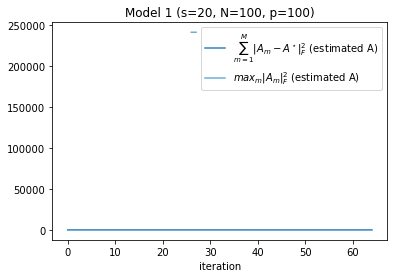

In [94]:


plt.title("Model 1 (s=20, N=100, p=100)")


filename = "model1_tridiag1_p100_N100_Iest_res.csv"
path="../results2/"
count = 0
list_res = list()
ini_res_list = list()
res_list = list()
distA_list = list()
A_norm_list = list()
with open(path+filename, newline='') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    
    
    for row in reader:
        count +=1
        if count<=25:
            ini_res_list.append(row)
        elif count <= 50:
            res_list.append(row)
        elif count <= 75:
            distA_list.append(row)
        else:
            A_norm_list.append(row)
plt.plot(distA_list[10], label=r'$\sum_{m=1}^M\|A_m-A^\star\|_F^2$ (estimated A)', color=color_map(0))
y = np.arange(len(ini_res_list[10]),len(ini_res_list[10])+len(A_norm_list[10]))
plt.plot(y,[i**2 for i in A_norm_list[10]], label=r'$max_m|A_m\|_F^2$ (estimated A)',color=color_map(1))



plt.xlabel("iteration")


plt.legend(bbox_to_anchor=(1., 1.))